In [1]:
from cars2 import Car, Simulator, Road
import numpy as np
from matplotlib import pyplot as plt
import random as random
import seaborn
%matplotlib inline
import pandas as pd

In [2]:
def random_car():
    num = random.random()
    if num < .1:
        return Car(target_speed=39, inc=5, chance=.05) # aggressive
    if .1 < num < .25:
        return Car(target_speed=28, min_mult=2, inc=1.5, length=25) # commercial
    else:
        return Car() # normal

In [3]:
mods = [1, 1.4, 1, 2, 1, 1.2, 1]
km = 7
time = 60
road = Road(km, mods)
cars = [random_car() for _ in range(km*30)]

In [4]:
sim = Simulator(cars, road, 1)

In [5]:
data = {}
index = [car.target_speed for car in cars]
for idx in range(100):
    shist = sim.loop(time)
    data[idx] = shist # list (ave_speed, std_dev_speed) for that run
    sim.reset()
frame = pd.DataFrame(data)

In [6]:
frame.shape

(60, 100)

In [7]:
speeds = frame.applymap(sum)

In [12]:
speeds[100] = sum(speeds[i] for i in range(100))/100
speeds[101] = pd.Series(range(100))

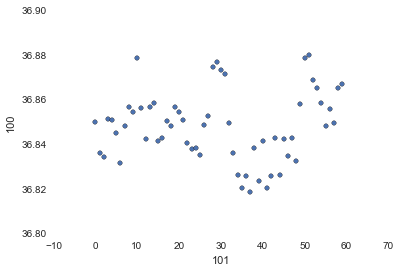

In [13]:
speeds.plot(kind="scatter", x=101, y=100)
# Average of speeds across all samples by second

In [24]:
print("mean:{}m/s, or {}km/h, standard deviation: {}km/s".format(round(speeds[100].mean(), 2), int(speeds[100].mean()*3.6), round(speeds[100].std()*3.6, 4)))

mean:36.85m/s, or 132km/h, standard deviation: 0.0567km/s


In [15]:
shist = sim.loop(240)
hist = sim.history
frame = pd.DataFrame(hist)
frame.shape

(240, 210)

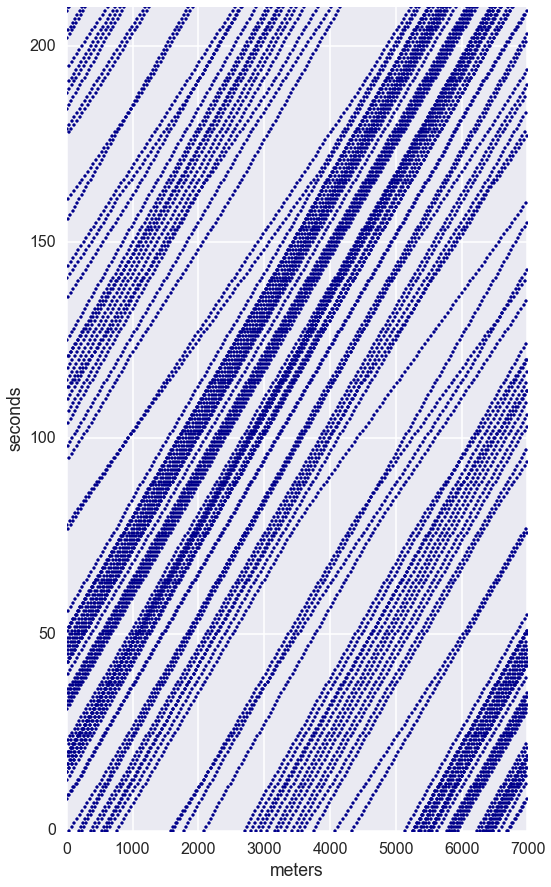

In [21]:
frame[210] = np.array(range(240))
kind = 'scatter'
marker = '.'
s=30
seaborn.set_style('darkgrid')
seaborn.set_context('poster')
ax = frame.plot(kind=kind, x=0, y=210, marker=marker, color='darkblue', s=s)
for i in range(1, 60):
    frame.plot(kind=kind, x=i, y=210, ax=ax, marker=marker, color='darkblue', s=s)
plt.subplots_adjust(left=1, right =1.5, top=2.3, bottom=1)
plt.axis([0,7000, 0, 210])
plt.xlabel('meters')
plt.ylabel('seconds')